# Analyse bivariée

## Analyse des liaisons entre deux variables quantitatives:

#### Analyse graphique

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
df = pd.read_csv('/Users/hadjer/Desktop/dataset_gab*.csv')
df

,nbr_semaine,saison,Plage_horaire,Gab_Code,GabAgence,CodeAgence,CodeWilaya,position_Geographique,Nbr_Transaction_Semaine,retrait_Semaine,Nbr_Transaction_Weekend,retrait_Weekend,evenements
0,1,hiver,après-midi,800005027,"""CHERAGA \r""",17030,16,nord,104,1655000,0,0,jour de lan
1,1,hiver,après-midi,800010027,"""DAR EL BEIDA \r""",17070,16,nord,94,2169000,0,0,jour de lan
2,1,hiver,après-midi,800019027,"""ORAN USTO \r""",17100,31,ouest,78,1810000,0,0,jour de lan
3,1,hiver,après-midi,800022027,"""BEJAIA \r""",17130,6,est,48,709000,0,0,jour de lan
4,1,hiver,après-midi,800023027,"""BEJAIA \r""",17130,6,est,20,279000,0,0,jour de lan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18432,53,hiver,midi,800242027,"""AGENCE HO.BAB EZZOUAR \r""",17800,16,nord,1,2000,1,2000,inconnu
18433,53,hiver,soir,800029027,"""BORDJ EL KIFFAN \r""",17190,16,nord,52,638000,52,638000,inconnu
18434,53,hiver,soir,800043027,"""HASSI MESSAOUD \r""",17330,30,sud,1,2000,1,2000,inconnu
18435,53,hiver,soir,800145027,"""ORAN USTO \r""",17100,31,ouest,3,18000,3,18000,inconnu


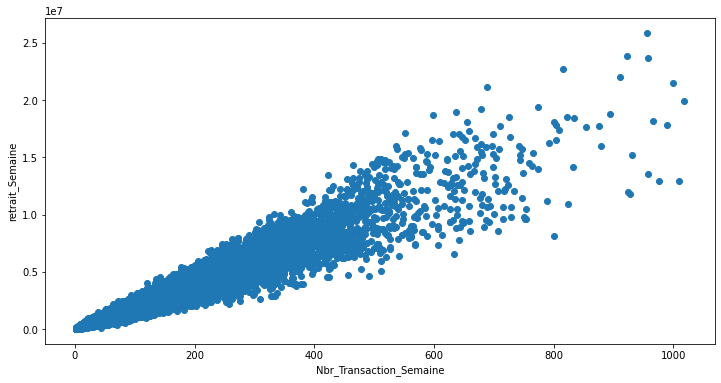

In [2]:
fig, ax=plt.subplots(figsize=(12,6))
ax.scatter(df['Nbr_Transaction_Semaine'],df['retrait_Semaine'])
ax.set_xlabel('Nbr_Transaction_Semaine')
ax.set_ylabel('retrait_Semaine')
plt.show()

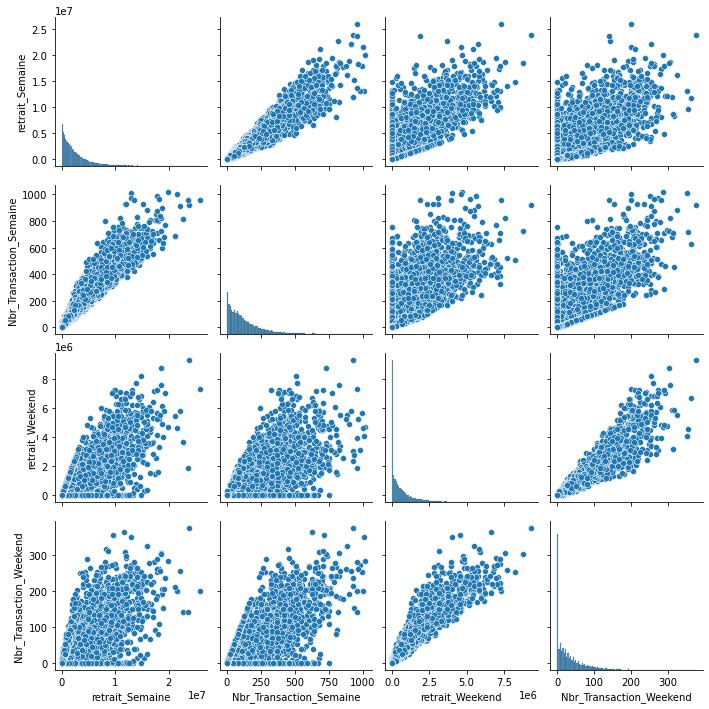

In [3]:
import seaborn as sns
import pandas as pd

variables_quantitatives = ['retrait_Semaine', 'Nbr_Transaction_Semaine', 'retrait_Weekend', 
                           'Nbr_Transaction_Weekend']
df_quantitatives = df[variables_quantitatives]

# Utilisez la fonction pairplot pour tracer les graphiques de dispersion entre les variables quantitatives
sns.pairplot(df_quantitatives, kind="scatter")

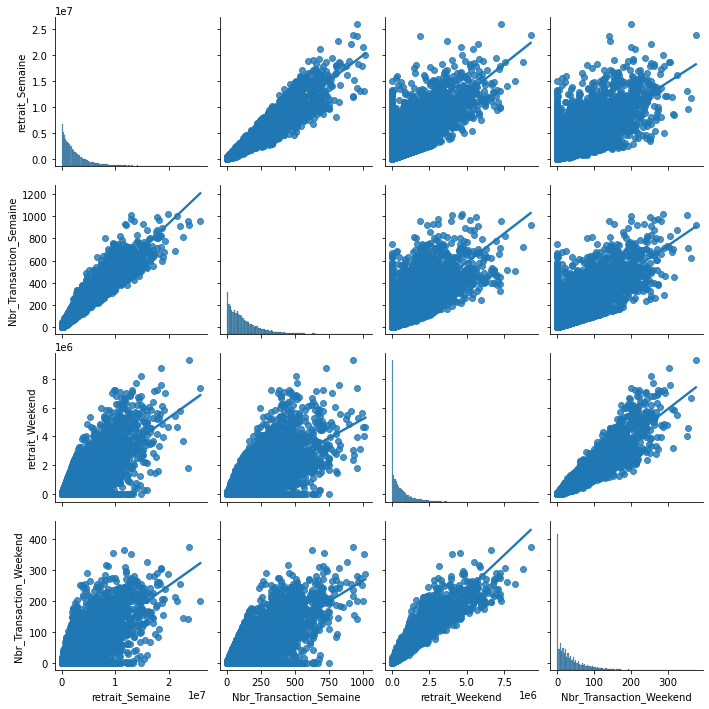

In [4]:
import seaborn as sns
import pandas as pd

variables_quantitatives = ['retrait_Semaine', 'Nbr_Transaction_Semaine', 'retrait_Weekend', 
                           'Nbr_Transaction_Weekend']
df_quantitatives = df[variables_quantitatives]
sns.pairplot(df_quantitatives, kind="reg")

### interprétation

##### 1) retrait VS nbr_transactions: 
lorsque le nombre de transactions augmente le retrait augmente également. Cela signifie qu’il existe une corrélation positive entre ces deux variables (relation lineaire).

##### 2) retrait_semaine VS retrait_weekend:
Lors de la premiere semaine y'avait pas de weekend ce qui explique le fait que le retrait semaine augmente sachant que le retrait weekend ne varie pas. 
sinon en general lorsque le nombre de retraits pendant les weekends augmente, le nombre de retraits pour la semaine d'après augmente également. Cela signifie qu’il existe une corrélation positive entre ces deux variables (relation lineaire!).

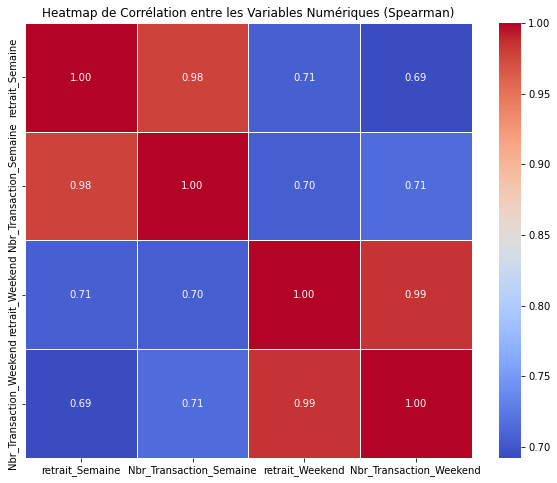

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionner uniquement les variables numériques
df_numerique = df[['retrait_Semaine', 'Nbr_Transaction_Semaine', 'retrait_Weekend', 'Nbr_Transaction_Weekend']]

# Calculer la matrice de corrélation en utilisant la corrélation de Spearman
corr_matrix = df_numerique.corr(method='spearman')

# Créer une heatmap de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap de Corrélation entre les Variables Numériques (Spearman)')
plt.show()


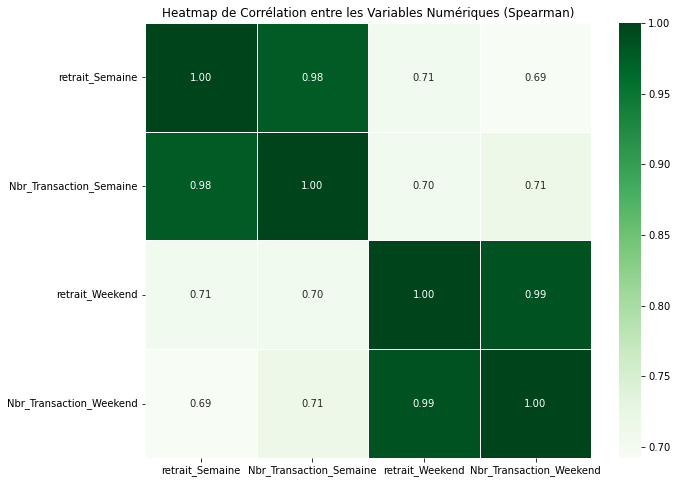

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionner uniquement les variables numériques
df_numerique = df[['retrait_Semaine', 'Nbr_Transaction_Semaine', 'retrait_Weekend', 'Nbr_Transaction_Weekend']]

# Calculer la matrice de corrélation en utilisant la corrélation de Spearman
corr_matrix = df_numerique.corr(method='spearman')

# Créer une heatmap de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', fmt=".2f", linewidths=.5)

# Rotation des labels sur l'axe des y pour les afficher verticalement
plt.yticks(rotation=0)

plt.title('Heatmap de Corrélation entre les Variables Numériques (Spearman)')
plt.show()


In [6]:
# Corrélation de spearman
from scipy.stats import shapiro, pearsonr, spearmanr, kendalltau
spearmanr(df['retrait_Semaine'], df['Nbr_Transaction_Semaine'])

SpearmanrResult(correlation=0.9776930171518842, pvalue=0.0)

## Analyse des liaisons entre deux variables qualitatives:

#### saison VS plage_horaire:

##### Test du chi-carré:

In [12]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Créer le tableau de contingence
tableau_contingence = pd.crosstab(df.saison, df.Plage_horaire)

print("Tableau de contingence :")
print(tableau_contingence)

# Test du chi carré
chi2, p, dof, expected = chi2_contingency(tableau_contingence)

# Affichage des résultats du test
print("\nRésultats du test du chi carré :")
print(f"Statistique du chi carré : {chi2:.4f}")
print(f"Valeur p : {p:.4f}")
print("Fréquences attendues :")
print(expected)

Tableau de contingence :
Plage_horaire  après-midi  matin  midi  soir
saison                                      
automne              1103   1098  1087  1052
hiver                1222   1224  1213  1164
printemps            1198   1195  1193  1146
été                  1142   1142  1143  1115

Résultats du test du chi carré :
Statistique du chi carré : 0.3367
Valeur p : 1.0000
Fréquences attendues :
[[1098.12333894 1096.71096165 1091.29684873 1053.86885068]
 [1220.33383956 1218.76427835 1212.74762705 1171.15425503]
 [1197.30867278 1195.76872593 1189.86559636 1149.05700494]
 [1149.23414872 1147.75603406 1142.08992786 1102.91988935]]


La valeur de Chi carré indique à quel point les valeurs observées dans le tableau de contingence diffèrent des valeurs attendues si les variables étaient indépendantes. Plus précisément, elle mesure la force de l'association entre les variables.

la valeur de chi carré est faible ce qui indique une association plus faible entre les variables saison et plage_horaire.

Étant donné que la valeur p est très élevée (1.0000), nous ne pouvons pas rejeter l'hypothèse nulle selon laquelle il n'y a pas de relation significative entre les variables "Plage_horaire" et "saison". En d'autres termes, il n'y a pas de preuve statistique pour affirmer que les périodes de la journée (après-midi, matin, midi, soir) varient de manière significative en fonction des saisons (automne, hiver, printemps, été) dans votre tableau de contingence.

#### evenements VS saison:

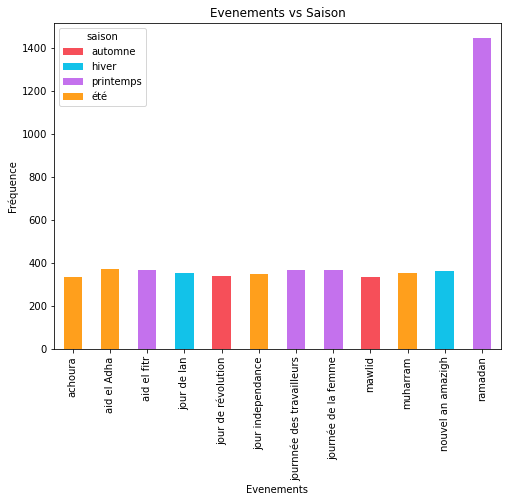

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrer le dataframe pour exclure les événements "inconnu"
df_filtered = df[df['evenements'] != 'inconnu']

# Créer le tableau de contingence
ct = pd.crosstab(df_filtered['evenements'], df_filtered['saison'])

# Plotter le tableau de contingence
ct.plot(kind="bar", stacked=True, figsize=(8, 6), 
        color=['#f64f59', '#12c2e9', '#c471ed', '#ff9f1c'])

plt.title('Evenements vs Saison')
plt.xlabel('Evenements')
plt.ylabel('Fréquence')
plt.xticks(rotation=90)
plt.show()


In [15]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Créer le tableau de contingence
tableau_contingence = pd.crosstab(df.evenements, df.saison)

print("Tableau de contingence :")
print(tableau_contingence)

# Test du chi carré
chi2, p, dof, expected = chi2_contingency(tableau_contingence)

# Affichage des résultats du test
print("\nRésultats du test du chi carré :")
print(f"Statistique du chi carré : {chi2:.4f}")
print(f"Valeur p : {p:.4f}")
print("Fréquences attendues :")
print(expected)

Tableau de contingence :
saison                     automne  hiver  printemps   été
evenements                                                
achoura                          0      0          0   334
aid el Adha                      0      0          0   370
aid el fitr                      0      0        366     0
inconnu                       3669   4109       2190  3135
jour de lan                      0    353          0     0
jour de révolution             338      0          0     0
jour independance                0      0          0   348
journnée des travailleurs        0      0        366     0
journée de la femme              0      0        365     0
mawlid                         333      0          0     0
muharram                         0      0          0   355
nouvel an amazigh                0    361          0     0
ramadan                          0      0       1445     0

Résultats du test du chi carré :
Statistique du chi carré : 16519.5508
Valeur p : 0.0000


Les résultats du test indiquent une forte association entre les variables saison et evenements avec une valeur de Chi carré élevée, et la p-value très faible egale a 0  indique une forte certitude que cette association n'est pas due au hasard.

#### codeWilaya VS Gab_Code:

In [16]:
from scipy.stats import chi2_contingency

# Créer le tableau de contingence
tableau_contingence = pd.crosstab(df.CodeWilaya, df.Gab_Code)

# Effectuer le test du chi carré
chi2, p_value, _, _ = chi2_contingency(tableau_contingence)

# Afficher les résultats du test
print("Test du Chi carré :")
print("Valeur de Chi carré :", chi2)
print("P-value :", p_value)

Test du Chi carré :
Valeur de Chi carré : 424051.0
P-value : 0.0


Les résultats du test indiquent une forte association entre ces deux variables.

#### position_Geographique VS Gab_Code:

In [17]:
from scipy.stats import chi2_contingency

# Créer le tableau de contingence
tableau_contingence = pd.crosstab(df.position_Geographique, df.Gab_Code)

# Effectuer le test du chi carré
chi2, p_value, _, _ = chi2_contingency(tableau_contingence)

# Afficher les résultats du test
print("Test du Chi carré :")
print("Valeur de Chi carré :", chi2)
print("P-value :", p_value)

Test du Chi carré :
Valeur de Chi carré : 55311.0
P-value : 0.0


### position-geographique VS plage-horaire:

In [9]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Créer le tableau de contingence
tableau_contingence = pd.crosstab(df.position_Geographique, df.saison)

print("Tableau de contingence :")
print(tableau_contingence)

# Test du chi carré
chi2, p, dof, expected = chi2_contingency(tableau_contingence)

# Affichage des résultats du test
print("\nRésultats du test du chi carré :")
print(f"Statistique du chi carré : {chi2:.4f}")
print(f"Valeur p : {p:.4f}")
print("Fréquences attendues :")
print(expected)

Tableau de contingence :
saison                 automne  hiver  printemps   été
position_Geographique                                 
est                       1222   1300       1272  1267
nord                      2109   2410       2347  2213
ouest                      916   1004       1010   958
sud                         93    109        103   104

Résultats du test du chi carré :
Statistique du chi carré : 3.9720
Valeur p : 0.9132
Fréquences attendues :
[[1191.34023974 1323.92487932 1298.94516461 1246.78971633]
 [2137.16222813 2375.0077019  2330.19623583 2236.63383414]
 [ 915.22048056 1017.07566307  997.88555622  957.81830016]
 [  96.27705158  106.99175571  104.97304334  100.75814937]]


Les résultats du test indiquent une forte association entre ces deux variables.

## Analyse des liaisons entre une variable quantitative et une variable qualitative:

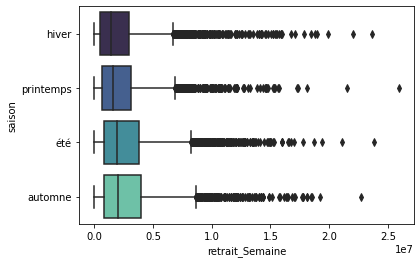

In [18]:
sns.boxplot(x="retrait_Semaine", y="saison", data=df, palette="mako");

### Test ANOVA :

#### retrait_Semaine VS saison

In [3]:
from scipy.stats import f_oneway

# Séparer les données selon les saisons
retrait_automne = df[df['saison'] == 'automne']['retrait_Semaine']
retrait_hiver = df[df['saison'] == 'hiver']['retrait_Semaine']
retrait_printemps = df[df['saison'] == 'printemps']['retrait_Semaine']
retrait_ete = df[df['saison'] == 'été']['retrait_Semaine']

# Appliquer le test ANOVA
statistic, p_value = f_oneway(retrait_automne, retrait_hiver, retrait_printemps, retrait_ete)

# Afficher les résultats
print("Statistique de test ANOVA:", statistic)
print("Valeur de p (p-value):", p_value)

alpha = 0.05  # Seuil alpha

# Condition pour évaluer l'effet de la saison sur les retraits par semaine
if p_value < alpha:
    print("La saison a un effet significatif sur les retraits par semaine (rejeter l'hypothèse nulle).")
else:
    print("La saison n'a pas d'effet significatif sur les retraits par semaine (ne pas rejeter l'hypothèse nulle).")


Statistique de test ANOVA: 80.04472801427822
Valeur de p (p-value): 1.9205609355844057e-51
La saison a un effet significatif sur les retraits par semaine (rejeter l'hypothèse nulle).


#### retrait_Semaine VS plage_horaire

In [4]:
from scipy.stats import f_oneway

# Séparer les données par plage horaire
retrait_apres_midi = df[df['Plage_horaire'] == 'après-midi']['retrait_Semaine']
retrait_matin = df[df['Plage_horaire'] == 'matin']['retrait_Semaine']
retrait_midi = df[df['Plage_horaire'] == 'midi']['retrait_Semaine']
retrait_soir = df[df['Plage_horaire'] == 'soir']['retrait_Semaine']

# Effectuer le test ANOVA
f_statistic, p_value = f_oneway(retrait_apres_midi, retrait_matin, retrait_midi, retrait_soir)

# Afficher les résultats
print("Statistique F :", f_statistic)
print("Valeur de p :", p_value)

# Interprétation
alpha = 0.05
if p_value < alpha:
    print("La plage horaire a un effet significatif sur les retraits semaine.")
else:
    print("La plage horaire n'a pas d'effet significatif sur les retraits semaine.")


Statistique F : 611.2447651620477
Valeur de p : 0.0
La plage horaire a un effet significatif sur les retraits semaine.


#### retrait_Semaine VS evenements

In [7]:
from scipy.stats import f_oneway

# Séparer les données par événements
retrait_ramadan = df[df['evenements'] == 'ramadan']['retrait_Semaine']
retrait_aid_el_Adha = df[df['evenements'] == 'aid el Adha']['retrait_Semaine']
retrait_aid_el_fitr = df[df['evenements'] == 'aid el fitr']['retrait_Semaine']
retrait_journee_travailleurs = df[df['evenements'] == 'journnée des travailleurs']['retrait_Semaine']
retrait_journee_femme = df[df['evenements'] == 'journée de la femme']['retrait_Semaine']
retrait_nouvel_an_amazigh = df[df['evenements'] == 'nouvel an amazigh']['retrait_Semaine']
retrait_muharram = df[df['evenements'] == 'muharram']['retrait_Semaine']
retrait_jour_de_lan = df[df['evenements'] == 'jour de lan']['retrait_Semaine']
retrait_jour_independance = df[df['evenements'] == 'jour independance']['retrait_Semaine']
retrait_jour_revolution = df[df['evenements'] == 'jour de révolution']['retrait_Semaine']
retrait_achoura = df[df['evenements'] == 'achoura']['retrait_Semaine']
retrait_mawlid = df[df['evenements'] == 'mawlid']['retrait_Semaine']
#retrait_inconnu = df[df['evenements'] == 'inconnu']['retrait_Semaine']  # Pas d'événements

# Effectuer le test ANOVA
f_statistic, p_value = f_oneway(retrait_ramadan, retrait_aid_el_Adha, retrait_aid_el_fitr,
                                 retrait_journee_travailleurs, retrait_journee_femme,
                                 retrait_nouvel_an_amazigh, retrait_muharram,
                                 retrait_jour_de_lan, retrait_jour_independance,
                                 retrait_jour_revolution, retrait_achoura,
                                 retrait_mawlid)

# Afficher les résultats
print("Statistique F :", f_statistic)
print("Valeur de p :", p_value)

# Interprétation
alpha = 0.05
if p_value < alpha:
    print("Les événements ont un effet significatif sur les retraits semaine.")
else:
    print("Les événements n'ont pas d'effet significatif sur les retraits semaine.")


Statistique F : 31.821160646575418
Valeur de p : 4.4692693088077044e-66
Les événements ont un effet significatif sur les retraits semaine.


#### retrait_Semaine VS position_Geographique

In [8]:
from scipy.stats import f_oneway

# Séparer les données par position géographique
retrait_est = df[df['position_Geographique'] == 'est']['retrait_Semaine']
retrait_ouest = df[df['position_Geographique'] == 'ouest']['retrait_Semaine']
retrait_nord = df[df['position_Geographique'] == 'nord']['retrait_Semaine']
retrait_sud = df[df['position_Geographique'] == 'sud']['retrait_Semaine']

# Effectuer le test ANOVA
f_statistic, p_value = f_oneway(retrait_est, retrait_ouest, retrait_nord, retrait_sud)

# Afficher les résultats
print("Statistique F :", f_statistic)
print("Valeur de p :", p_value)

# Interprétation
alpha = 0.05
if p_value < alpha:
    print("La position géographique a un effet significatif sur les retraits semaine.")
else:
    print("La position géographique n'a pas d'effet significatif sur les retraits semaine.")


Statistique F : 131.40069917481205
Valeur de p : 3.154160133494927e-84
La position géographique a un effet significatif sur les retraits semaine.


# retrait semaine VS gab_code

In [2]:
from scipy.stats import f_oneway

# Sélection des données pour le test ANOVA
data_grouped = []

for gab_code, group_data in df.groupby('Gab_Code'):
    data_grouped.append(group_data['retrait_Semaine'])

# Test ANOVA
f_statistic, p_value = f_oneway(*data_grouped)

# Affichage des résultats
print("Test de Fisher (ANOVA) entre 'retrait semaine' et 'gab code':")
print("Statistique F :", f_statistic)
print("Valeur de p :", p_value)


Test de Fisher (ANOVA) entre 'retrait semaine' et 'gab code':
Statistique F : 185.90765241098873
Valeur de p : 0.0
